# Image Classification and Refression 
By Paul Asquin   
Deep Learning assignment from [Vincent Lepetit](https://www.labri.fr/perso/vlepetit/deep_learning_mva.php) courses - CentraleSupélec

# 3. Simple Classification

## a.Project definition

In [54]:
from mp1 import *
from keras.models import Sequential
from keras import metrics
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import SGD, Adam
from keras.utils import np_utils
import numpy as np

IMAGE_WIDTH = 72
IMAGE_HEIGHT = IMAGE_WIDTH

## b.Load the dataset

In [55]:
[X_train_raw, Y_train_raw] = generate_dataset_classification(300, 20)
labels =  {0:'Rectangle', 1 : 'Disk', 2 : 'Triangle'}

[X_test_raw, Y_test_raw] = generate_test_set_classification()
# Because of Jupyer Notebook, we create _raw dataset lists 
# as we don't want to run transformation multiple times with X_train = X_train...

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


## c.Dataset shaping

In [56]:
def transform_dataset(X_train_raw, Y_train_raw, dataset_reshaping=False):
    X_train = None
    Y_train = None
    
    if dataset_reshaping:
        print("X_train_raw shape : ", X_train_raw.shape)
        print("Y_train_raw shape : ", Y_train_raw.shape)
        print("\nReshaping dataset to '2D images'...")
        X_train = X_train_raw.reshape(-1, IMAGE_WIDTH, IMAGE_HEIGHT, 1)
        Y_train = np_utils.to_categorical(Y_train_raw)
    
    else:
        X_train = X_train_raw
        Y_train = np_utils.to_categorical(Y_train_raw, 3)
    
    return [X_train, Y_train]

X_train, Y_train = transform_dataset(X_train_raw, Y_train_raw)
print("X_train shape : ", X_train.shape)
print("Y_train shape : ", Y_train.shape)
print("labels : ", labels)

X_test, Y_test = X_test_raw, Y_test_raw
print("X_test shape : ", X_test.shape)
print("Y_test shape : ", Y_test.shape)


# Get input shape
input_shape = X_train.shape[1:]
print("Using input shape : ", input_shape)

X_train shape :  (300, 5184)
Y_train shape :  (300, 3)
labels :  {0: 'Rectangle', 1: 'Disk', 2: 'Triangle'}
X_test shape :  (300, 5184)
Y_test shape :  (300, 3)
Using input shape :  (5184,)


## d.Model building

### Test model function

In [51]:
def test_model(_model, little_test = False):
    global labels
    
    les_X_test = {
        'Rectangle' : data_generation.generate_a_rectangle(),
        'Disk' : data_generation.generate_a_disk(),
        'Triangle': data_generation.generate_a_triangle()[0]
         }

    for test_label, X_test in les_X_test.items():
        print("\nTrying to label a", test_label,"as test input")
        X_test = X_test.reshape(1, X_test.shape[0])
        prediction = _model.predict(X_test)
        print(prediction)
        print("A", labels[np.argmax(prediction)], "is guessed")

### i.Model with SGD : Stochatic Gradient Descent

In [72]:
# Define model
model1 = Sequential()
model1.add(Dense(len(labels), activation = 'softmax', input_shape=input_shape))

# Define optimizer
sgd = SGD(lr=0.001, nesterov = True, momentum=0.9)

# Compiling
model1.compile(loss='categorical_crossentropy',optimizer=sgd, metrics=['accuracy'])

# Fitting
model1.fit(X_train, Y_train, epochs=100, batch_size=32)

Epoch 1/100
300/300 [==============================] - 0s 2ms/step - loss: 1.1779 - acc: 0.3867
Epoch 2/100
300/300 [==============================] - 0s 139us/step - loss: 0.7553 - acc: 0.6567
Epoch 3/100
300/300 [==============================] - 0s 127us/step - loss: 0.5845 - acc: 0.7633
Epoch 4/100
300/300 [==============================] - 0s 140us/step - loss: 0.3960 - acc: 0.8667
Epoch 5/100
300/300 [==============================] - 0s 144us/step - loss: 0.3961 - acc: 0.8667
Epoch 6/100
300/300 [==============================] - 0s 136us/step - loss: 0.3123 - acc: 0.9067
Epoch 7/100
300/300 [==============================] - 0s 159us/step - loss: 0.2895 - acc: 0.9100
Epoch 8/100
300/300 [==============================] - 0s 153us/step - loss: 0.3148 - acc: 0.9033
Epoch 9/100
300/300 [==============================] - 0s 131us/step - loss: 0.2313 - acc: 0.9433
Epoch 10/100
300/300 [==============================] - 0s 118us/step - loss: 0.2558 - acc: 0.9100
Epoch 11/100
300/300 

300/300 [==============================] - 0s 149us/step - loss: 0.0336 - acc: 1.0000
Epoch 84/100
300/300 [==============================] - 0s 146us/step - loss: 0.0332 - acc: 1.0000
Epoch 85/100
300/300 [==============================] - 0s 132us/step - loss: 0.0338 - acc: 1.0000
Epoch 86/100
300/300 [==============================] - 0s 155us/step - loss: 0.0325 - acc: 1.0000
Epoch 87/100
300/300 [==============================] - 0s 129us/step - loss: 0.0323 - acc: 1.0000
Epoch 88/100
300/300 [==============================] - 0s 103us/step - loss: 0.0329 - acc: 1.0000
Epoch 89/100
300/300 [==============================] - 0s 104us/step - loss: 0.0326 - acc: 1.0000
Epoch 90/100
300/300 [==============================] - 0s 104us/step - loss: 0.0325 - acc: 1.0000
Epoch 91/100
300/300 [==============================] - 0s 93us/step - loss: 0.0307 - acc: 1.0000
Epoch 92/100
300/300 [==============================] - 0s 107us/step - loss: 0.0302 - acc: 1.0000
Epoch 93/100
300/300 [==

In [73]:
# Testing
scores = model1.evaluate(X_test, Y_test)
print("%s: %.2f%%" % (model1.metrics_names[1], scores[1]*100))
test_model(model1)

300/300 [==============================] - 0s 874us/step
acc: 33.00%

Trying to label a Rectangle as test input
[[1. 0. 0.]]
A Rectangle is guessed

Trying to label a Disk as test input
[[0. 1. 0.]]
A Disk is guessed

Trying to label a Triangle as test input
[[0. 0. 1.]]
A Triangle is guessed


We manage to reach great accuracies with this model

### ii. Model with adam

In [74]:
# Define model
model2 = Sequential()
model2.add(Dense(len(labels), activation = 'softmax', input_shape=input_shape))

# Compiling
model2.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['categorical_accuracy'])

# Fitting
model2.fit(X_train, Y_train, epochs=100, batch_size=32)


Epoch 1/100
300/300 [==============================] - 1s 2ms/step - loss: 2.2293 - categorical_accuracy: 0.3933
Epoch 2/100
300/300 [==============================] - 0s 135us/step - loss: 1.0508 - categorical_accuracy: 0.4833
Epoch 3/100
300/300 [==============================] - 0s 162us/step - loss: 0.6403 - categorical_accuracy: 0.7200
Epoch 4/100
300/300 [==============================] - 0s 136us/step - loss: 0.4773 - categorical_accuracy: 0.7700
Epoch 5/100
300/300 [==============================] - 0s 135us/step - loss: 0.4413 - categorical_accuracy: 0.8067
Epoch 6/100
300/300 [==============================] - 0s 163us/step - loss: 0.3149 - categorical_accuracy: 0.9333
Epoch 7/100
300/300 [==============================] - 0s 120us/step - loss: 0.2980 - categorical_accuracy: 0.9133
Epoch 8/100
300/300 [==============================] - 0s 154us/step - loss: 0.2874 - categorical_accuracy: 0.9133
Epoch 9/100
300/300 [==============================] - 0s 148us/step - loss: 0.228

300/300 [==============================] - 0s 106us/step - loss: 0.0154 - categorical_accuracy: 1.0000
Epoch 72/100
300/300 [==============================] - 0s 142us/step - loss: 0.0156 - categorical_accuracy: 1.0000
Epoch 73/100
300/300 [==============================] - 0s 128us/step - loss: 0.0149 - categorical_accuracy: 1.0000
Epoch 74/100
300/300 [==============================] - 0s 106us/step - loss: 0.0147 - categorical_accuracy: 1.0000
Epoch 75/100
300/300 [==============================] - 0s 102us/step - loss: 0.0139 - categorical_accuracy: 1.0000
Epoch 76/100
300/300 [==============================] - 0s 104us/step - loss: 0.0144 - categorical_accuracy: 1.0000
Epoch 77/100
300/300 [==============================] - 0s 117us/step - loss: 0.0142 - categorical_accuracy: 1.0000
Epoch 78/100
300/300 [==============================] - 0s 95us/step - loss: 0.0128 - categorical_accuracy: 1.0000
Epoch 79/100
300/300 [==============================] - 0s 109us/step - loss: 0.0128 -

In [75]:
# Testing
scores = model2.evaluate(X_test, Y_test)
print("%s: %.2f%%" % (model2.metrics_names[1], scores[1]*100))
test_model(model2)

300/300 [==============================] - 0s 869us/step
categorical_accuracy: 37.67%

Trying to label a Rectangle as test input
[[1. 0. 0.]]
A Rectangle is guessed

Trying to label a Disk as test input
[[0. 1. 0.]]
A Disk is guessed

Trying to label a Triangle as test input
[[0. 0. 1.]]
A Triangle is guessed


Once again, with adam our model is able to identify shapes

# 4. Visualisation of the Solution

Model 1 : SGD


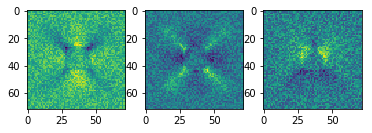

Model 2 : Adam


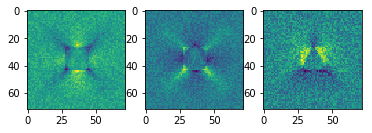

In [86]:
import matplotlib.pyplot as plt
def visualize(_model):
    weights = _model.get_weights()[0]
    fig = plt.figure()
    
    fig.add_subplot(1, 3, 1)
    plt.imshow(weights[:, 0].reshape(IMAGE_WIDTH, IMAGE_HEIGHT))
    
    fig.add_subplot(1, 3, 2)
    plt.imshow(weights[:, 1].reshape(IMAGE_WIDTH, IMAGE_HEIGHT))
    
    fig.add_subplot(1, 3, 3)
    plt.imshow(weights[:, 2].reshape(IMAGE_WIDTH, IMAGE_HEIGHT))
    
    plt.show()

print("Model 1 : SGD")
visualize(model1)
print("Model 2 : Adam")
visualize(model2)

With this visualisation, we are able to recognise Rectangle, Disk and Triangle recognition.

# A more difficult classification problem